# Задание

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [1]:
data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv', low_memory=False)

NameError: name 'pd' is not defined

## Задание 1

Используя библиотеку matplotlib, построй круговую диаграмму (Pie plot) для возраста респондента.

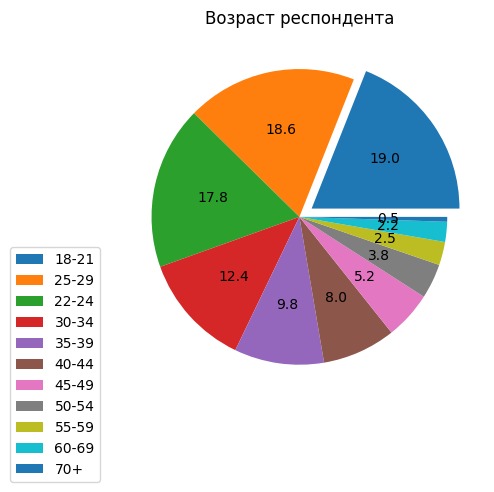

In [ ]:

ages = list(data['Q2'][1:].value_counts().index)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
fig, ax = plt.subplots()
ax.set_title("Возраст респондента")
ax.pie(data['Q2'][1:].value_counts(), explode = explode, autopct = '%1.1f')
plt.legend(labels = ages, loc = 'right', 
           bbox_to_anchor = (-0.02, 0.1), ncol = 1)

## Задание 2

Используя библиотеку seaborn, построй столбцовую диаграмму (Bar plot) по популярности библиотек для визуализации.

Text(0.5, 1.0, 'Популярность библиотек для визуализации')

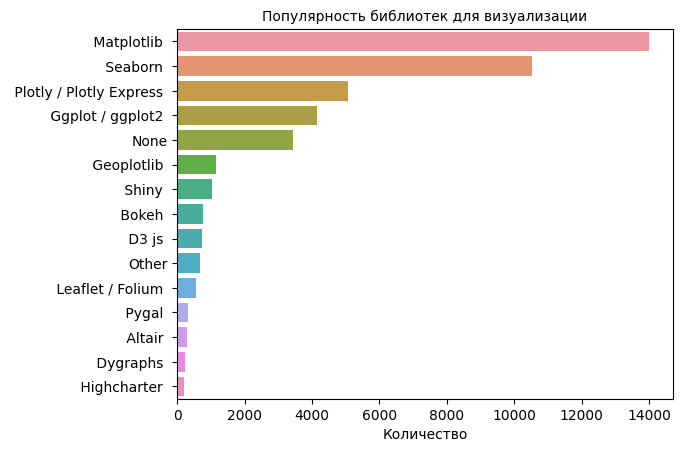

In [ ]:
import seaborn as sns
q15_columns = [col for col in data.columns if col.startswith('Q15')]
libraries = data[q15_columns].melt(var_name='вопрос', value_vars = q15_columns)
result = []
names = []
for i in range(15):
    names.append(libraries.value_counts().index[i][1])
    result.append(libraries.value_counts()[i])
x = names
y = result

sns.barplot(x=y, y=x);
plt.xlabel('Количество', size = 10)
plt.title('Популярность библиотек для визуализации', size = 10)

## Задание 3

Используя библиотеку seaborn, построй диаграмму "Ящик с усами" (Box plot) заработка по различным специальностям.

Text(0.5, 1.0, 'Годовой доход по специальностям')

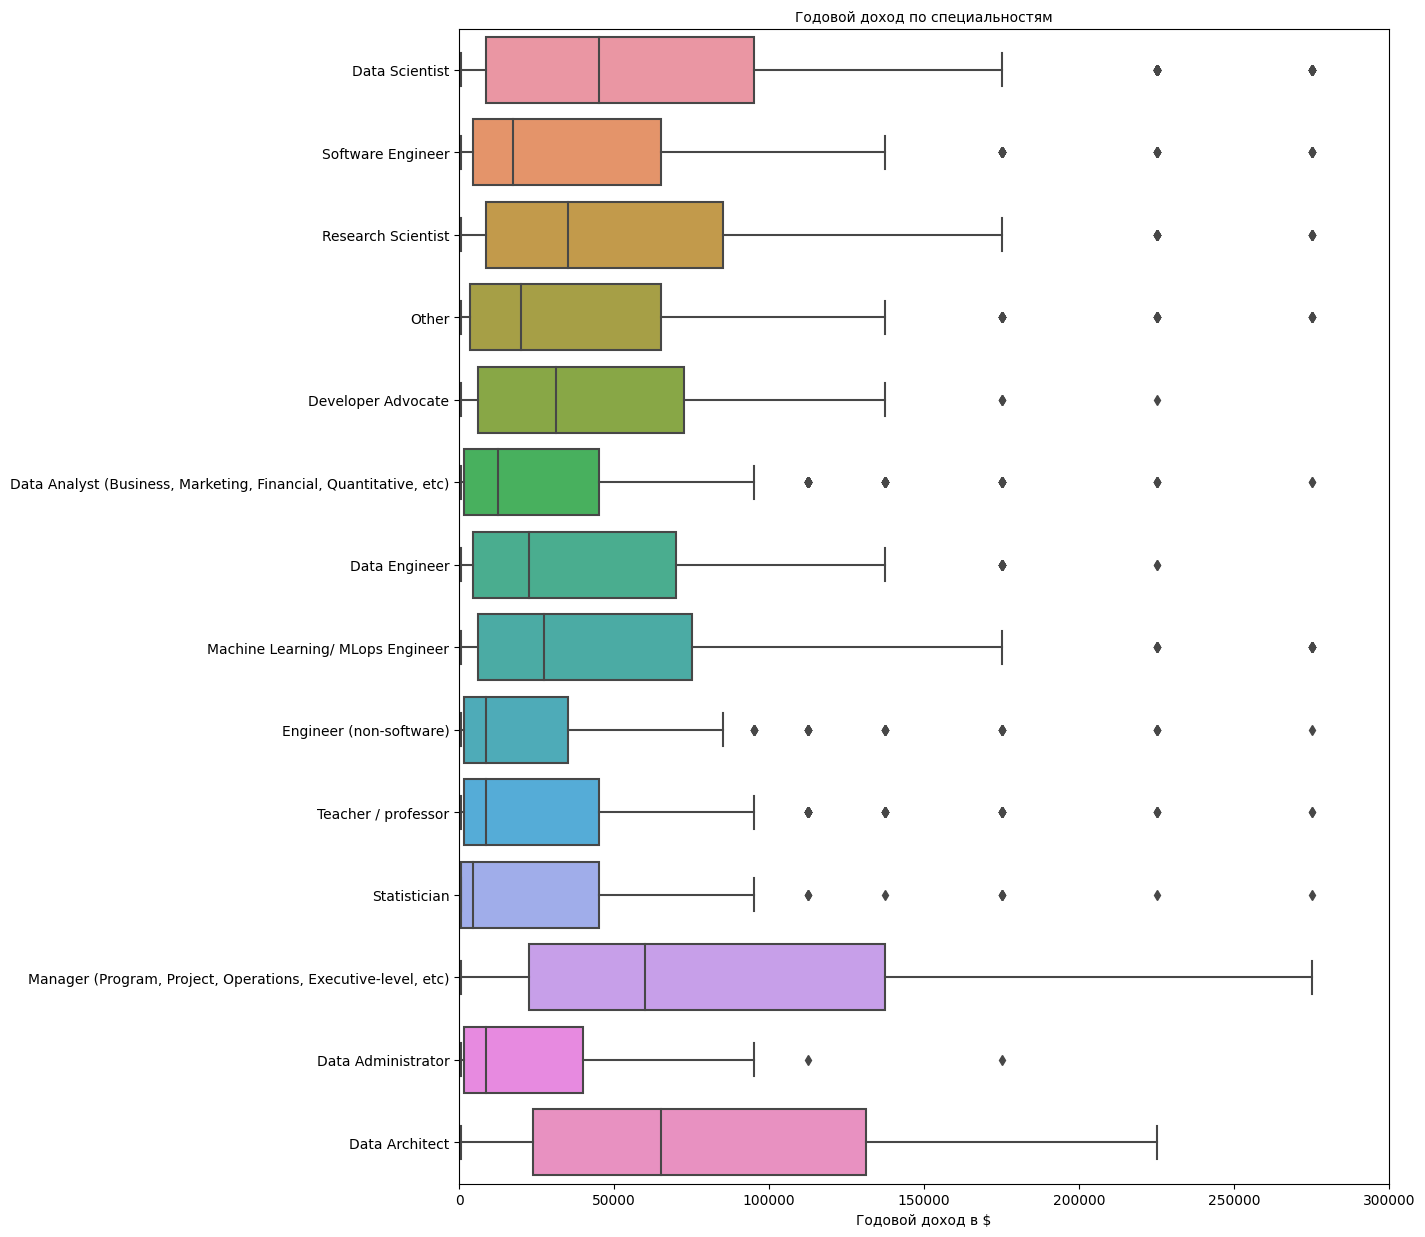

In [ ]:
compensation_mapping = {
    '$0-999': (999/2), '10,000-14,999': (10000+14999)/2, '30,000-39,999': (30000+39999)/2,
    '1,000-1,999': (1000+1999)/2, '40,000-49,999': (40000+49999)/2, '100,000-124,999': (100000+124999)/2,
    '5,000-7,499': (5000+7499)/2, '50,000-59,999': (50000+59999)/2, '7,500-9,999': (7500+9999)/2,
    '150,000-199,999': (150000+199999)/2, '20,000-24,999': (20000+24999)/2, '60,000-69,999': (60000+69999)/2,
    '15,000-19,999': (15000+19999)/2, '70,000-79,999': (70000+79999)/2,
    '25,000-29,999': (25000+29999)/2, '2,000-2,999': (2000+2999)/2,
    '125,000-149,999': (125000+149999)/2, '3,000-3,999': (3000+3999)/2,
    '4,000-4,999': (4000+4999)/2, '80,000-89,999': (80000+89999)/2,
    '90,000-99,999': (90000+99999)/2, '200,000-249,999': (200000+249999)/2,
    '250,000-299,999': (250000+299999)/2, '300,000-499,999': (300000+499999)/2,
    '$500,000-999,999': (500000+999999)/2, '>$1,000,000': (1000001),
}
data = data[data['Q23']!='Currently not employed']
data = data[data['Q23']!= data['Q23'][0]]
data['Q29-NEW'] = data['Q29'].map(compensation_mapping)
data[['Q29-NEW', 'Q23']].dropna()
plt.subplots(figsize=(12, 15))
x = data['Q29-NEW']
y = data['Q23']
ab = sns.boxplot(x = x, y=y)
plt.xlim([0,300000])
ab.set(xlabel='Годовой доход в $', ylabel='')
plt.title('Годовой доход по специальностям', size = 10)

## Задание 4
Используя библиотеку plotly, построй столбцовую диаграмму (Bar plot) на распределение респондентов по возрасту по
специальностям Data Administrator, Data Analyst, Data Engineer, Data Scientist, Engineer, MLops Engineer, 
Research Scientist, Software Engineer, Data Architect

In [3]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv', low_memory=False)
ages = data[['Q2', 'Q23']].dropna()
aqq = ages.sort_values( by = "Q2", ascending = True )
ds = aqq[aqq['Q23'] == "Data Scientist"]
data_admin = aqq[aqq['Q23'] == "Data Administrator"]
data_analyst = aqq[aqq['Q23'] == "Data Analyst (Business, Marketing, Financial, Quantitative, etc)"]
data_engin = aqq[aqq['Q23'] == "Data Engineer"]
engineer = aqq[aqq['Q23'] == 'Engineer (non-software)']
mlops = aqq[aqq['Q23'] == 'Machine Learning/ MLops Engineer']
research_sc = aqq[aqq['Q23'] == 'Research Scientist']
soft_eng = aqq[aqq['Q23'] == 'Software Engineer']
data_arch = aqq[aqq['Q23'] == 'Data Architect'] 
fig = make_subplots(rows=3, cols=3, subplot_titles=("<b><i>Data Administrator</i></b>", "<b><i>Data Analyst</i></b>", "<b><i>Data Engineer</i></b>", "<b><i>Data Scientist</i></b>", "<b><i>Engineer</i></b>", "<b><i>MLops Engineer</i></b>", "<b><i>Research Scientist</i></b>", "<b><i>Software Engineer</i></b>", "<b><i>Data Architect</i></b>")
)
fig1 = px.bar(ds['Q2'])
fig2 = px.bar(data_admin['Q2'])
fig3 = px.bar(data_analyst['Q2'])
fig4 = px.bar(data_engin['Q2'])
fig5 = px.bar(engineer['Q2'])
fig6 = px.bar(mlops['Q2'])
fig7 = px.bar(research_sc['Q2'])
fig8 = px.bar(soft_eng['Q2'], color_discrete_sequence=["#7FFF00"])
fig9 = px.bar(data_arch['Q2'])
fig.add_trace(fig2['data'][0], row=1, col=1)
fig.add_trace(fig3['data'][0], row=1, col=2)
fig.add_trace(fig4['data'][0], row=1, col=3)
fig.add_trace(fig1['data'][0],row=2, col=1)
fig.add_trace(fig5['data'][0], row=2, col=2)
fig.add_trace(fig6['data'][0], row=2, col=3)
fig.add_trace(fig7['data'][0], row=3, col=1)
fig.add_trace(fig8['data'][0], row=3, col=2)
fig.add_trace(fig9['data'][0], row=3, col=3)
fig.update_layout(height=600, width=800,
                  title_text="Распределение возрастов по специальностям")
fig.update_traces(marker_color='blue', marker_line_color='blue',
                  marker_line_width=1, opacity=1, row = 1, col = 1, name = 'Data Administrator')
fig.update_traces(marker_color='#FF0000', marker_line_color='red',
                  marker_line_width=1, opacity=1, row = 1, col = 2, name = 'Data Analyst')
fig.update_traces(marker_color='#3CB371', marker_line_color='#3CB371',
                  marker_line_width=1, opacity=1, row = 1, col = 3, name = 'Data Engineer')
fig.update_traces(marker_color='#BA55D3', marker_line_color='#BA55D3',
                  marker_line_width=1, opacity=1, row = 2, col = 1, name = 'Data Scientist')
fig.update_traces(marker_color='#FF8C00', marker_line_color='#FF8C00',
                  marker_line_width=1, opacity=1, row = 2, col = 2, name = 'Engineer')
fig.update_traces(marker_color='#00BFFF', marker_line_color='#00BFFF',
                  marker_line_width=1, opacity=1, row = 2, col = 3, name = 'MLops Engineer')
fig.update_traces(marker_color='#FF1493', marker_line_color='#FF1493',
                  marker_line_width=1, opacity=1, row = 3, col = 1, name = 'Research Scientist')
fig.update_traces(marker_color='#00FF7F', marker_line_color='#00FF7F',
                  marker_line_width=1, opacity=1, row = 3, col = 2, name = 'Software Engineer')
fig.update_traces(marker_color='#FF69B4', marker_line_color='#FF69B4',
                  marker_line_width=1, opacity=1, row = 3, col = 3, name = 'Data Architect')

fig.show()





## Задание 5

Используя библиотеку plotly, построй карту стран респондентов. В этом тебе поможет [plotly.choropleth](https://plotly.com/python/choropleth-maps/)

In [18]:
data = pd.read_csv('../datasets/kaggle_survey_2022_responses.csv', low_memory=False)
data2 = data[data['Q4']!='Other']
data2 = data2[data2['Q4'] != 'I do not wish to disclose my location']
data2 = data2[data2['Q4'] != 'In which country do you currently reside?']
countries1=pd.DataFrame()
countires = data2['Q4']
countries1['A'] = data2['Q4'].value_counts().values
countries1['B']= data2['Q4'].value_counts().index
countries1['C']= ['IND','USA','BRA','NGA','PAK', 'JPN','CHN','EGY','MEX','IDN','TUR','RUS','KOR','FRA','GBR','ESP','CAN','COL','BGD','TWN','VNM','ARG','KEN','ITA',
                  'MAR','AUS','THA','TUN','PER','IRN','CHL','POL',
                  'ZAF','PHL','NLD','GHA','ISR','DEU','ETH','ARE','PRT','SAU','UKR','LKA','NPL','MYS','CMR','SGP','DZA','HKG','ECU','ZWE','IRL','BEL','ROU','CZE']
fig = go.Figure(data=go.Choropleth(
locations = countries1["C"],
z = countries1["A"],
text = countries1["B"],
colorscale = "matter_r",
zmax = 1000,
zmin = 0,
marker_line_color="black",
marker_line_width=0.8,
colorbar_title = "<b>Количество респондентов</b>",
))
fig.update_layout(width = 1000, height = 700, title_text="<b>Карта мира</b>", title_x=0.5)
fig.show()


## Задание 6 - Дополнительное

Одна из самых красивых и динамичных визуализаций - это [Bar Chart Race](https://pypi.org/project/bar-chart-race/). 
Выбери данные, которые интересно было бы визуализировать с помощью этой библиотеки, и поделись с ним со своими одногруппниками.

In [ ]:
# Код тут